# Edge Detection using Sobel, Canny and Laplacian

In [2]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

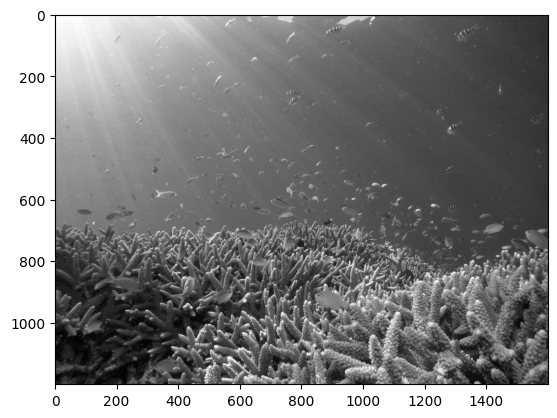

In [3]:
# Implementing it is straight forward in openCV

# read it in grayscale, as this is what we need in edge detection
image = cv.imread('./images/coral_reef2.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')

In [4]:
# -- Sobel edge detector --

# First apply horizontal Sobel (in x direction)
sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, 
         ksize=3) #define derivative in x direction as dx=1 dy=0
# Than apply vertical Sobel (in y direction)
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, 
         ksize=3) 

# After getting the x,y derivative, you get the magnitude
sobel_combine = cv.magnitude(sobel_x, sobel_y)

# -- Laplacian edge detector --

laplacian = cv.Laplacian(image, cv.CV_64F, ksize=3) 
# in laplacian you get both positive/negative changes, you get absolute to plot proper mask
laplacian_abs = cv.convertScaleAbs(laplacian) # get absolute value

# -- Canny edge detector --
canny_edges = cv.Canny(image, 
         threshold1=180,
         threshold2=200)




In [ ]:
print(laplacian)     # it has also negative values 
print(laplacian_abs) # it has absolute value of it

[[  0.   0.   0. ...   0.   4.   8.]
 [  0.   0.   0. ...   0.   6.   4.]
 [  0.   0.   0. ...  -2.   4.   0.]
 ...
 [ 24.   2.  -8. ...  -8.  16.  52.]
 [ 24.   0. -14. ... -48. -32.   8.]
 [  0. -24. -36. ...  -8.  -8.  24.]]
[[ 0  0  0 ...  0  4  8]
 [ 0  0  0 ...  0  6  4]
 [ 0  0  0 ...  2  4  0]
 ...
 [24  2  8 ...  8 16 52]
 [24  0 14 ... 48 32  8]
 [ 0 24 36 ...  8  8 24]]


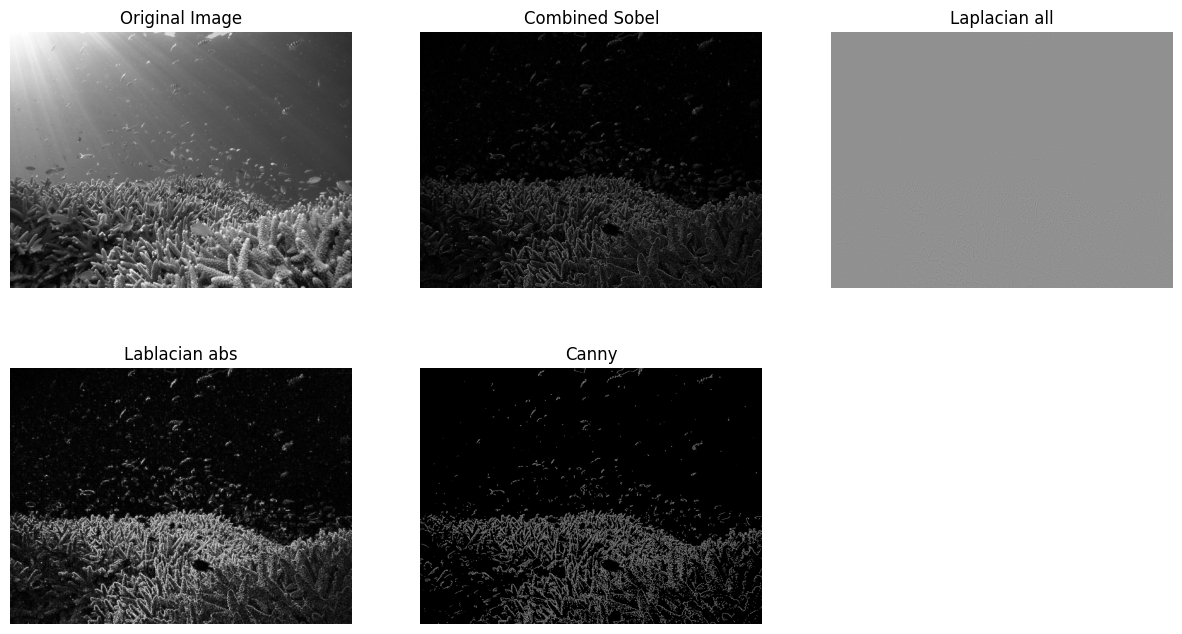

In [ ]:
# Plotting 

titles = ["Original Image", "Combined Sobel", "Laplacian all", "Lablacian abs", "Canny"]
images = [image, sobel_combine, laplacian, laplacian_abs, canny_edges]

plt.figure(figsize=(15,8))

for i in range(len(titles)): 
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

# plt.tight_layout()
plt.show()

# Laplacian all has negative value and therefore is not shown properly! 

# Canny takes care of the noise components ;)